In [33]:
import pandas as pd

# Load the dataset to examine its structure and content
file_path = 'shootings.csv'
df = pd.read_csv(file_path)

# Show the first few rows of the dataset to understand its structure
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,02.01.2015,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,02.01.2015,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,03.01.2015,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,04.01.2015,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,04.01.2015,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


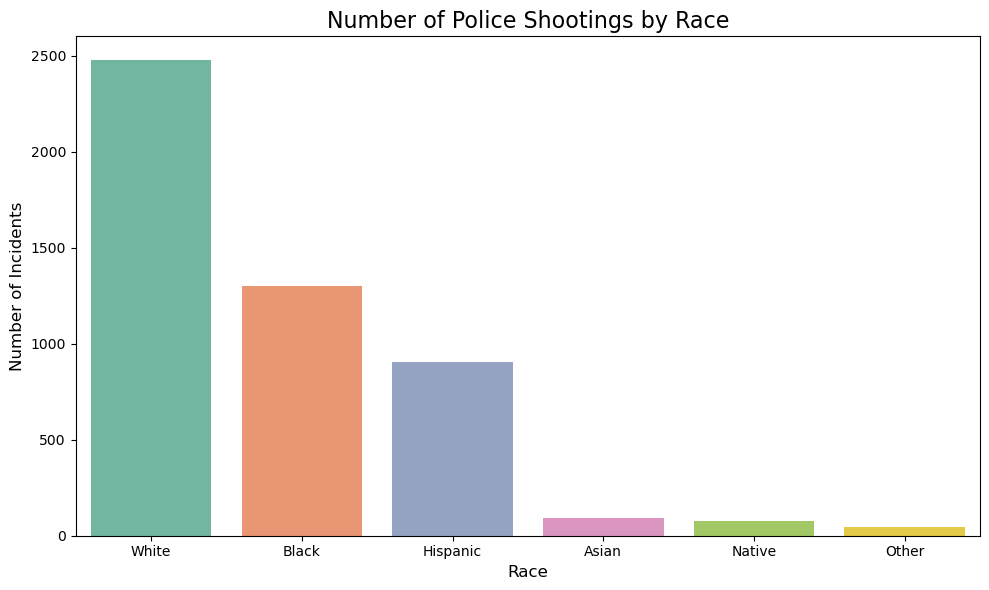

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for the Bar Chart of incidents by race
plt.figure(figsize=(10, 6))
race_counts = df['race'].value_counts()

# Create the bar chart
sns.barplot(x=race_counts.index, y=race_counts.values, palette='Set2')
plt.title('Number of Police Shootings by Race', fontsize=16)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)

# Display the chart
plt.tight_layout()
plt.show()

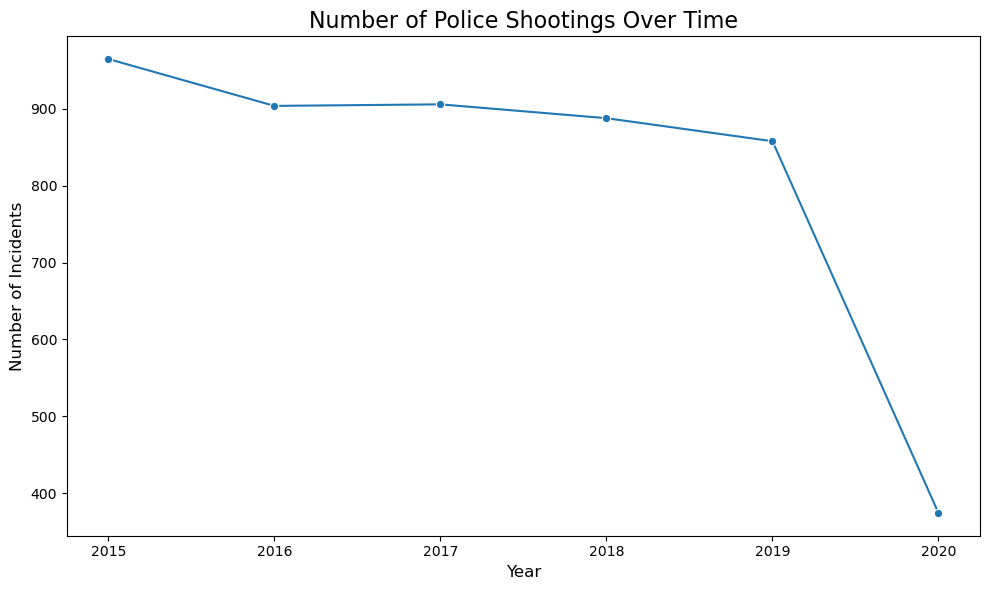

In [35]:
# Convert the 'date' column to datetime to enable time series analysis
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y', errors='coerce')

# Group the data by year to count incidents over time
df['year'] = df['date'].dt.year
incidents_by_year = df['year'].value_counts().sort_index()

# Plot a line chart to show incidents over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=incidents_by_year.index, y=incidents_by_year.values, marker='o')

# Customize the plot
plt.title('Number of Police Shootings Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

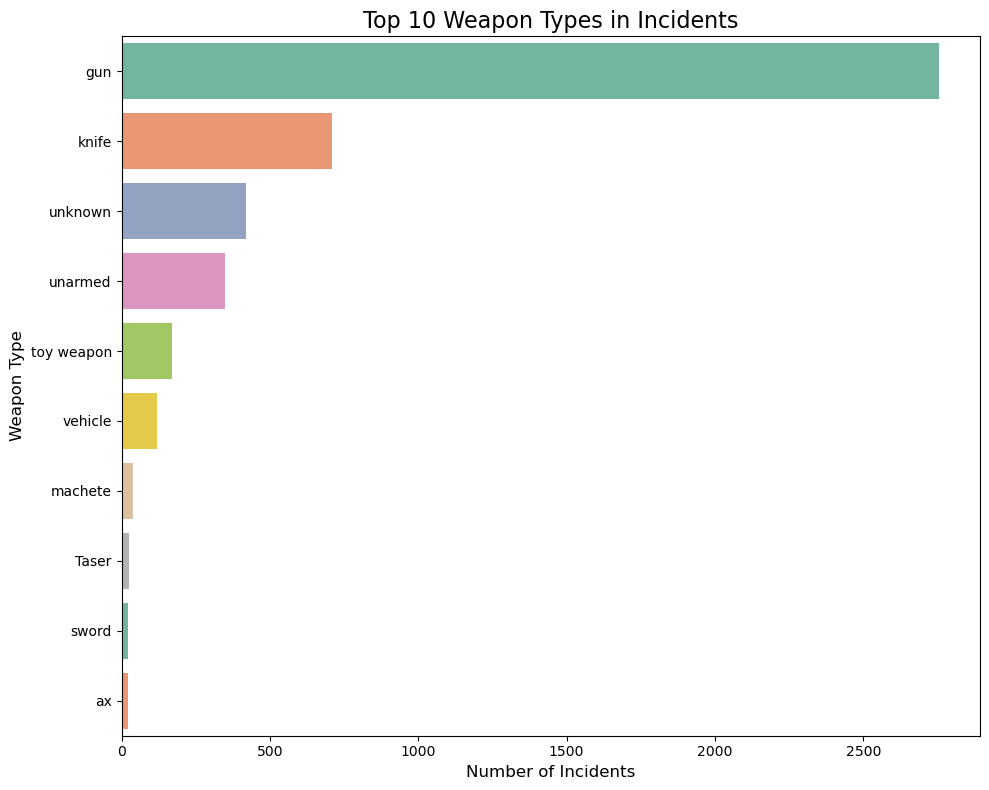

In [36]:
# Horizontal Bar Chart for armed status
plt.figure(figsize=(10, 8))
armed_counts = df['armed'].value_counts().head(10)

# Create horizontal bar chart
sns.barplot(x=armed_counts.values, y=armed_counts.index, palette='Set2')
plt.title('Top 10 Weapon Types in Incidents', fontsize=16)
plt.xlabel('Number of Incidents', fontsize=12)
plt.ylabel('Weapon Type', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

In [37]:
import plotly.express as px

# Group the data by state and count the number of shootings
state_shootings = df.groupby('state').size().reset_index(name='shooting_count')

# Create a choropleth map using Plotly
fig = px.choropleth(
    state_shootings,
    locations='state', 
    locationmode='USA-states', 
    color='shooting_count',
    scope="usa",
    color_continuous_scale="Reds",
    labels={'shooting_count':'Number of Shootings'},
    title='Police Shootings by State in the US'
)

# Show the plot
fig.show()


In [38]:
# Load the uploaded dataset to examine its contents
file_path = 'shootings.csv'
shootings_data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the dataset
shootings_data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,02.01.2015,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,02.01.2015,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,03.01.2015,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,04.01.2015,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,04.01.2015,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Dummy data for demonstration
races = ['White', 'Black', 'Hispanic', 'Asian', 'Other']
absolute_numbers = [500, 300, 200, 50, 30]
normalized_scaled = [5, 9, 7, 1, 2]
race_counts = pd.Series([500, 300, 200, 50, 30], index=races)

x = np.arange(len(races))

In [40]:
# Step 1: Count occurrences of each race in the dataset
race_counts = shootings_data['race'].value_counts()

# Display the race counts to understand the distribution
race_counts


race
White       2476
Black       1298
Hispanic     902
Asian         93
Native        78
Other         48
Name: count, dtype: int64

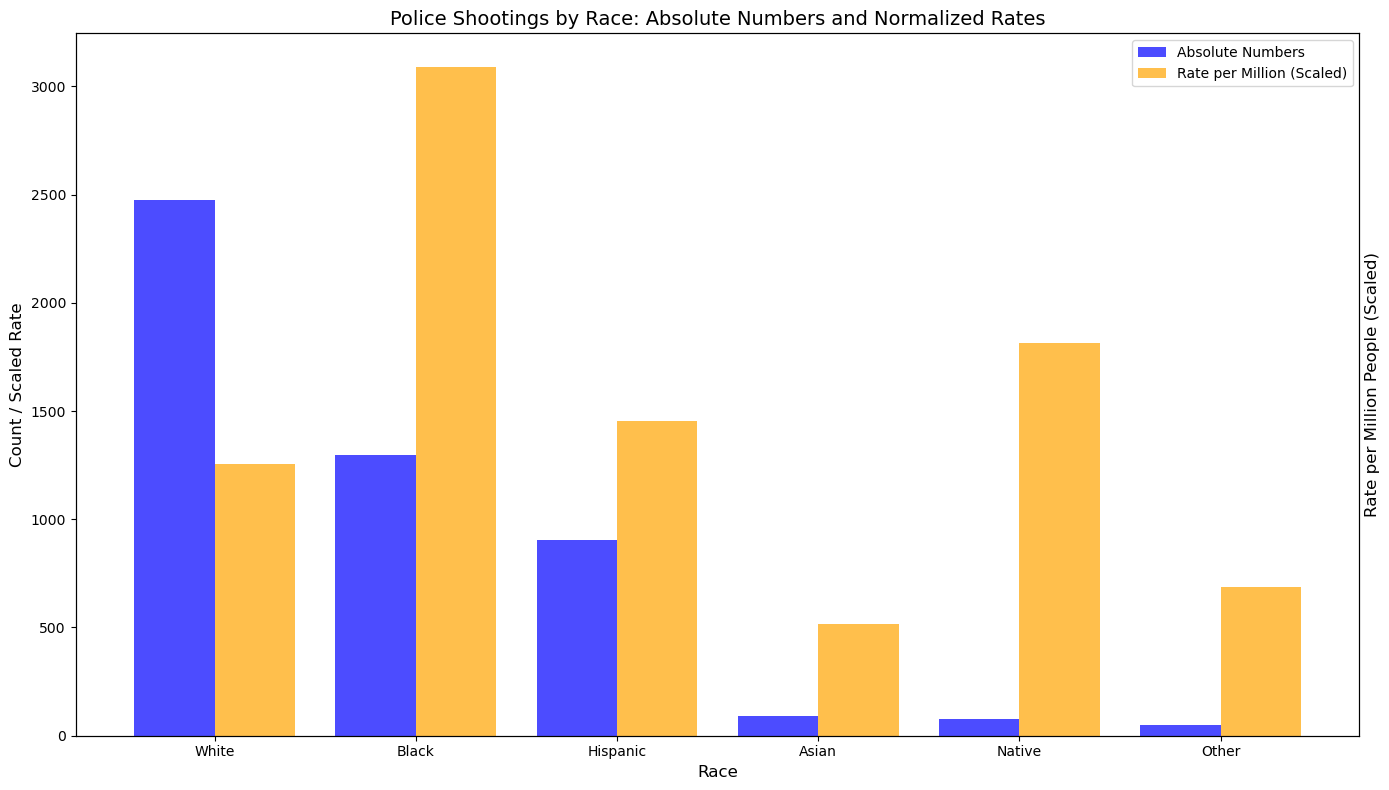

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming standard US population estimates for normalization (per million people)
race_mapping = {
    "White": 197.5,  # Population in millions
    "Black": 42.0,
    "Hispanic": 62.1,
    "Asian": 18.0,
    "Native": 4.3,
    "Other": 7.0,  # Arbitrary value for illustrative purposes
}

# Calculate normalized rates (rate per million people)
normalized_rates = {race: race_counts[race] / population for race, population in race_mapping.items() if race in race_counts}

# Extract races, absolute numbers, and normalized numbers
races = list(race_counts.index)
absolute_numbers = [race_counts[race] for race in races if race in race_mapping]
normalized_numbers = [normalized_rates[race] for race in races if race in race_mapping]

# Set positions for bars
x = np.arange(len(races))  # X positions for the races

# Plot side-by-side bars
fig, ax = plt.subplots(figsize=(14, 8))

# Bars for absolute numbers
ax.bar(x - 0.2, absolute_numbers, width=0.4, label='Absolute Numbers', color='blue', alpha=0.7)

# Bars for normalized rates (scaled for better comparison)
normalized_scaled = [rate * 100 for rate in normalized_numbers]  # Scale normalized rates
ax.bar(x + 0.2, normalized_scaled, width=0.4, label='Rate per Million (Scaled)', color='orange', alpha=0.7)

# Labels and title
ax.set_xlabel('Race', fontsize=12)
ax.set_ylabel('Count / Scaled Rate', fontsize=12)
ax.set_title('Police Shootings by Race: Absolute Numbers and Normalized Rates', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(races, fontsize=10)
ax.legend()

# Add a secondary y-axis for the normalized rates
ax2 = ax.twinx()
ax2.set_ylabel('Rate per Million People (Scaled)', fontsize=12)
ax2.set_yticks([])  # Hide secondary y-axis ticks for simplicity

plt.tight_layout()
plt.show()

In [42]:
# Convert 'date' column to datetime and extract year for grouping
shootings_data['date'] = pd.to_datetime(shootings_data['date'], dayfirst=True)
shootings_data['year'] = shootings_data['date'].dt.year

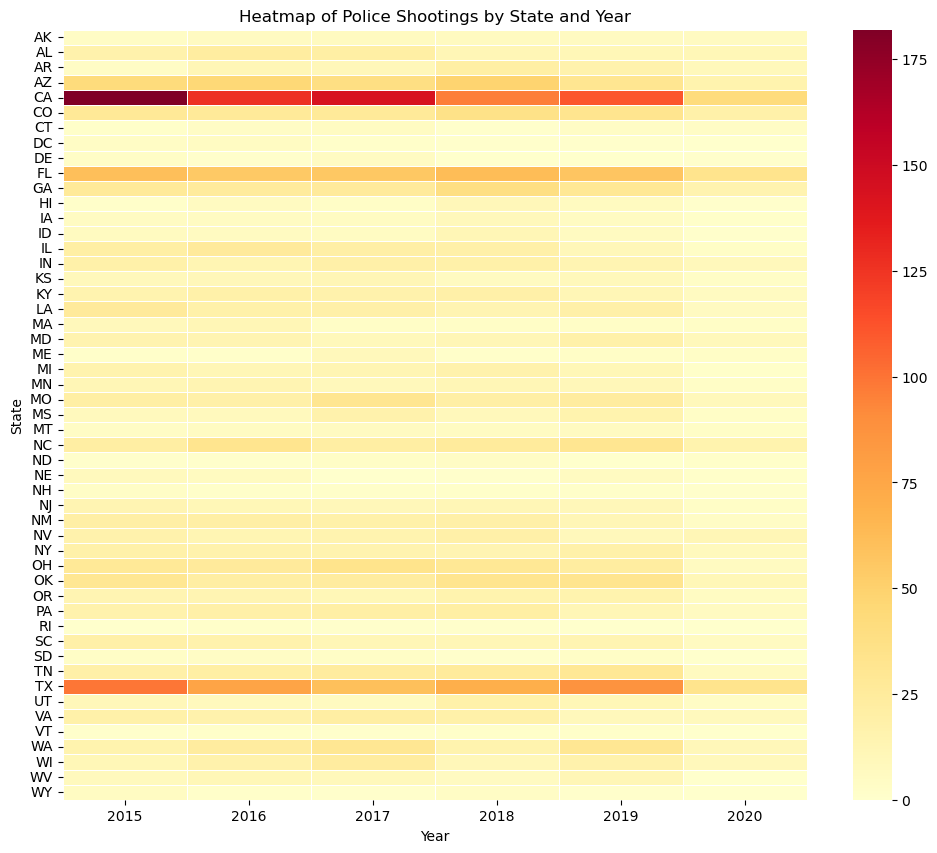

In [43]:
# Create a dataframe for the heatmap
heatmap_data = shootings_data.groupby(['state', 'year']).size().unstack(fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, cmap="YlOrRd", linewidths=.5)
plt.title('Heatmap of Police Shootings by State and Year')
plt.xlabel('Year')
plt.ylabel('State')
plt.show()


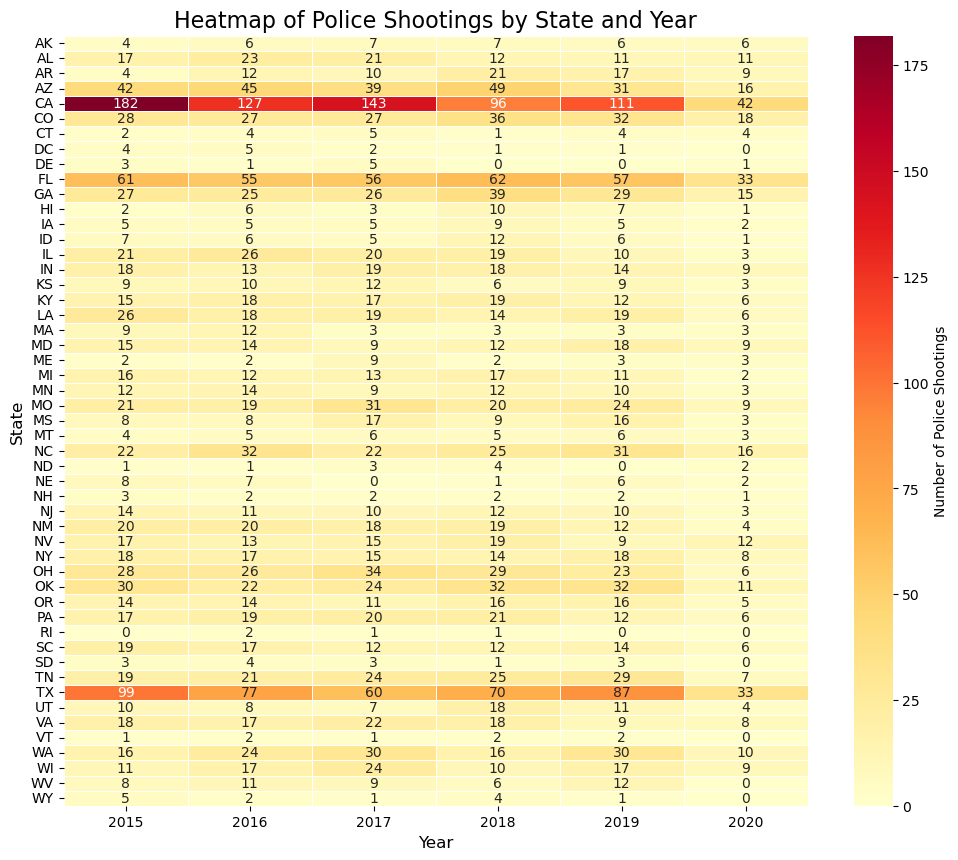

In [44]:
# Plotting the heatmap with a titled color bar (scale)
plt.figure(figsize=(12, 10))
sns.heatmap(
    heatmap_data,
    cmap="YlOrRd",
    linewidths=.5,
    annot=True,  # Add annotations for each cell
    fmt="d",  # Format annotations as integers
    cbar_kws={'label': 'Number of Police Shootings'}  # Title for the color bar
)
plt.title('Heatmap of Police Shootings by State and Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

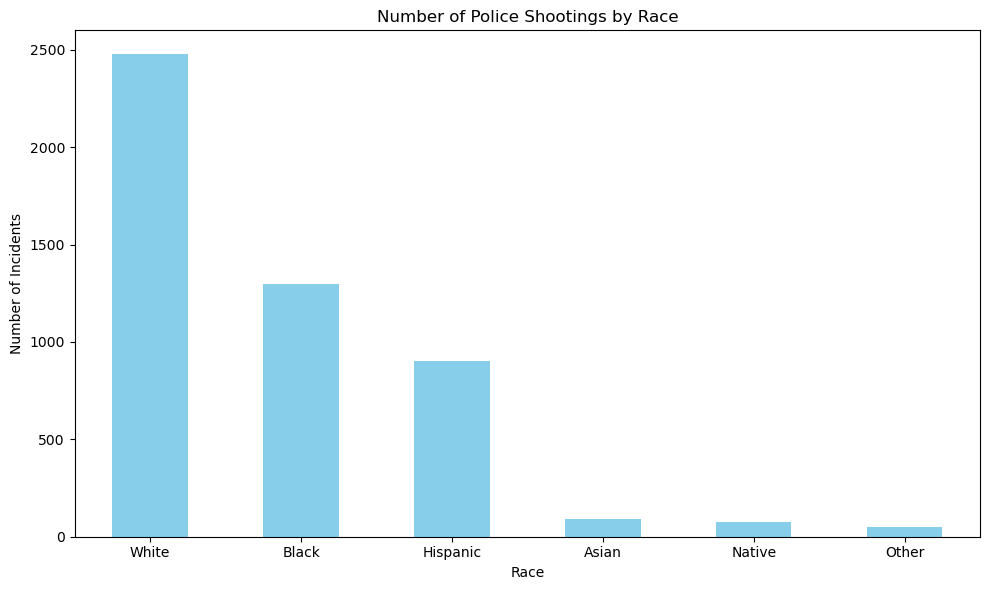

In [45]:
# Create a bar chart for incidents by race
race_data = shootings_data['race'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
race_data.plot(kind='bar', color='skyblue')
plt.title('Number of Police Shootings by Race')
plt.xlabel('Race')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

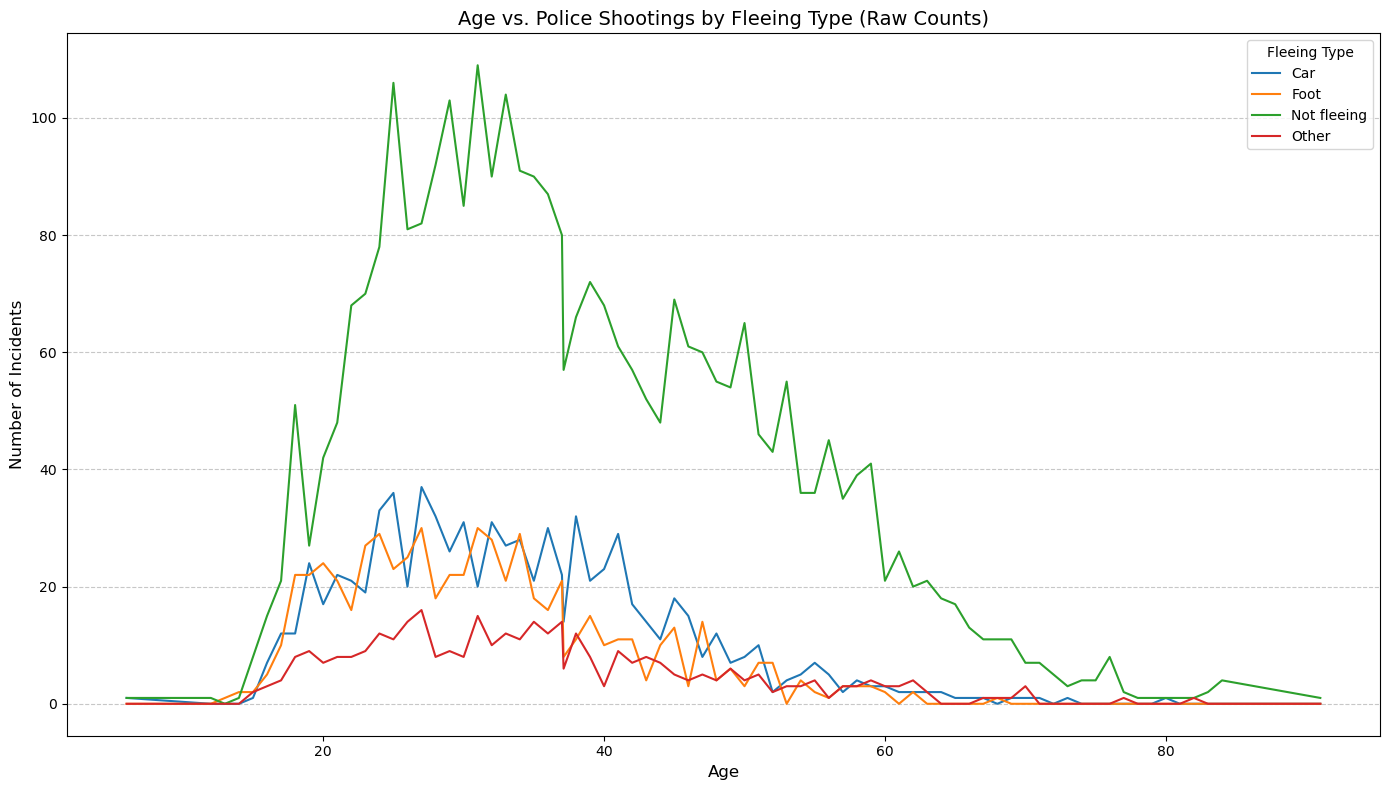

In [46]:
# Group by age and fleeing type, then count occurrences
flee_type_counts_raw = shootings_data.groupby(['age', 'flee']).size().unstack(fill_value=0)

# Plot the line chart for raw fleeing type counts
plt.figure(figsize=(14, 8))
for flee_type in flee_type_counts_raw.columns:
    plt.plot(
        flee_type_counts_raw.index,  # Use raw age values as x-axis
        flee_type_counts_raw[flee_type],
        label=flee_type
    )

# Adding titles, labels, and legend
plt.title('Age vs. Police Shootings by Fleeing Type (Raw Counts)', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.legend(title='Fleeing Type', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to fit everything
plt.show()


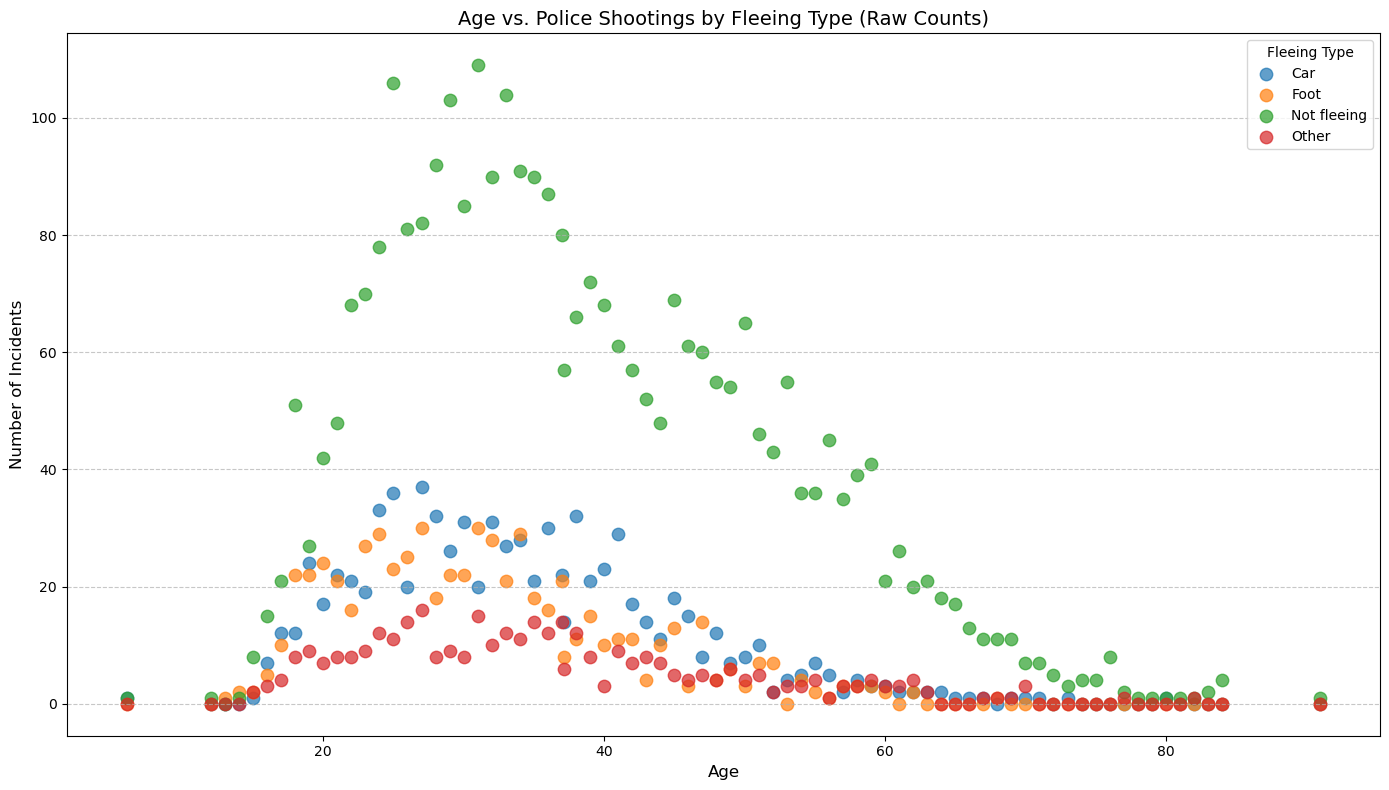

In [47]:
# Plot a scatter plot for raw fleeing type counts
plt.figure(figsize=(14, 8))
for flee_type in flee_type_counts_raw.columns:
    plt.scatter(
        flee_type_counts_raw.index,  # Use raw age values directly as x-axis
        flee_type_counts_raw[flee_type],
        label=flee_type,
        s=80,  # Size of the scatter points
        alpha=0.7  # Transparency for better visibility
    )

# Adding titles, labels, and legend
plt.title('Age vs. Police Shootings by Fleeing Type (Raw Counts)', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.legend(title='Fleeing Type', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to fit everything
plt.show()


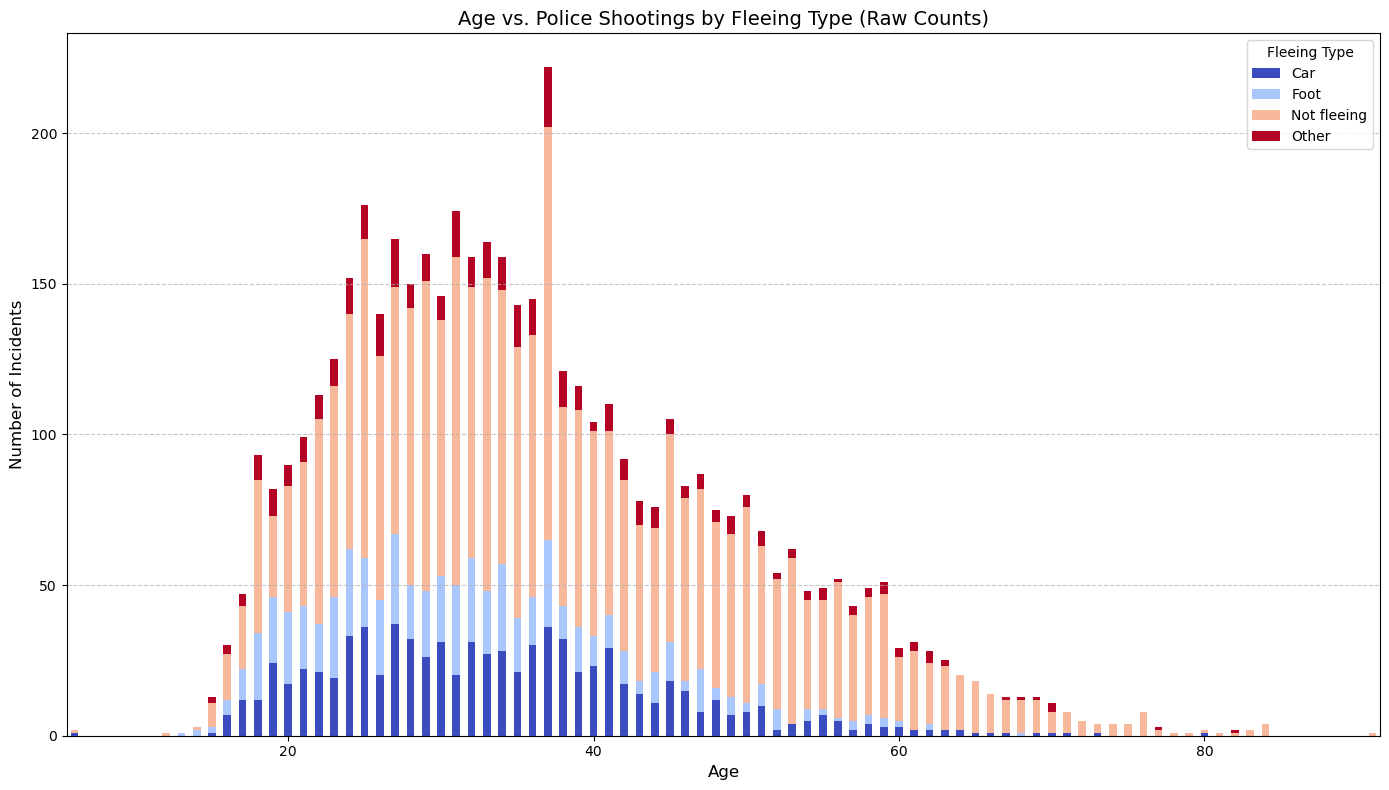

In [48]:
# Recreate age bins with a size of one year
shootings_data['age_bin'] = pd.cut(
    shootings_data['age'], 
    bins=range(int(shootings_data['age'].min()), int(shootings_data['age'].max()) + 2), 
    right=False
)

# Group by age bins and fleeing type, then count occurrences
flee_type_counts_one_year_corrected = shootings_data.groupby(['age_bin', 'flee']).size().unstack(fill_value=0)

# Use the lower bound of each age bin as the x-axis labels
age_bin_labels = [int(interval.left) for interval in flee_type_counts_one_year_corrected.index]

# Adjusting the x-axis to show fewer ticks (e.g., 20, 40, 60, 80) without twisting the labels
plt.figure(figsize=(14, 8))

# Plotting the stacked bar chart
flee_type_counts_one_year_corrected.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    colormap='coolwarm',
    ax=plt.gca()
)

# Adjusting x-axis ticks to show only specific values (e.g., 20, 40, 60, 80) without rotation
tick_positions = [i for i, age in enumerate(age_bin_labels) if age % 20 == 0]
tick_labels = [age_bin_labels[i] for i in tick_positions]
plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=0)  # No rotation

# Adding titles and labels
plt.title('Age vs. Police Shootings by Fleeing Type (Raw Counts)', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.legend(title='Fleeing Type', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()


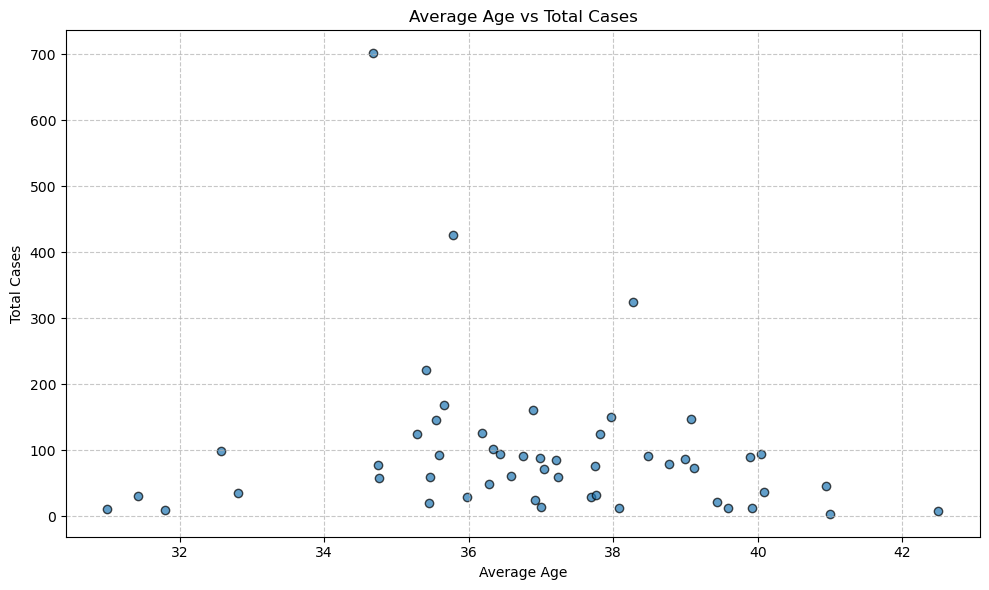

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Lade deine Daten
data = pd.read_csv('shootings.csv')  # Ersetze 'shootings.csv' mit deinem Dateipfad

# Konvertiere das Datum in ein Jahr
data['year'] = pd.to_datetime(data['date'], errors='coerce').dt.year

# Aggregiere die Daten nach Bundesstaat
aggregated_data = data.groupby('state').agg(
    avg_age=('age', 'mean'),
    total_cases=('id', 'count')
).reset_index()

# Scatterplot: Average Age vs Total Cases
plt.figure(figsize=(10, 6))
plt.scatter(
    aggregated_data['avg_age'], 
    aggregated_data['total_cases'], 
    alpha=0.7, 
    edgecolor='k'
)
plt.xlabel('Average Age')
plt.ylabel('Total Cases')
plt.title('Average Age vs Total Cases')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


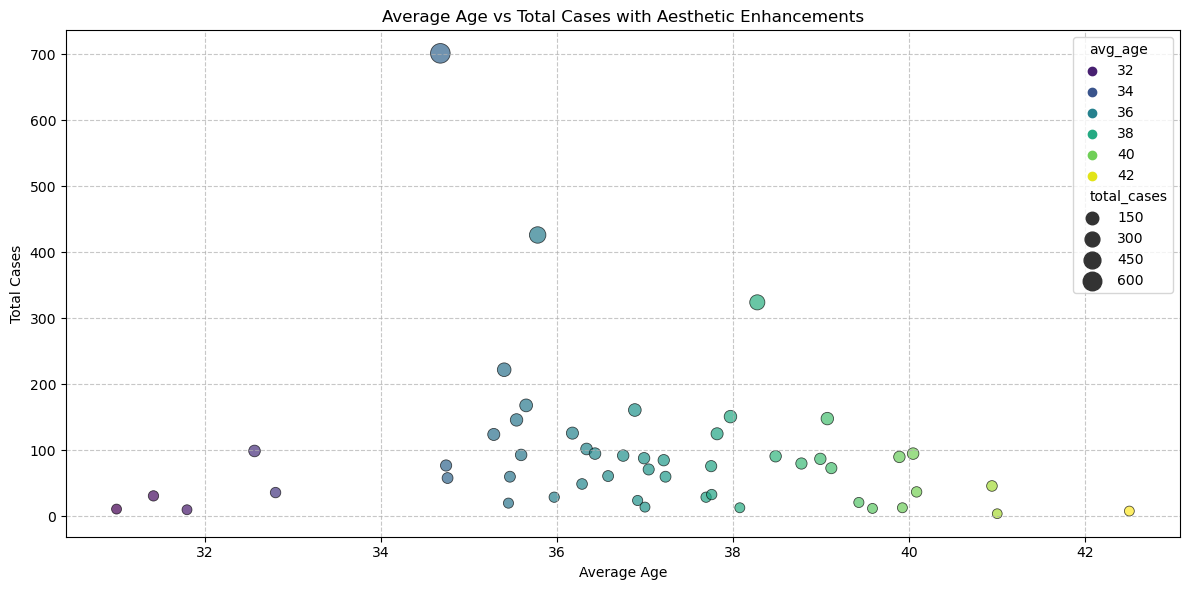

In [50]:
# Enhanced Scatterplot with Aesthetics (Color for Average Age, Size for Total Cases)
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=aggregated_data,  # Verwende die aggregierten Daten
    x='avg_age',           # Durchschnittsalter (x-Achse)
    y='total_cases',       # Gesamtfälle (y-Achse)
    hue='avg_age',         # Farbschema basierend auf Alter
    size='total_cases',    # Punktgröße basierend auf Fallzahl
    sizes=(50, 200),
    alpha=0.7,
    palette='viridis',
    edgecolor='k'
)
plt.title('Average Age vs Total Cases with Aesthetic Enhancements')
plt.xlabel('Average Age')
plt.ylabel('Total Cases')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

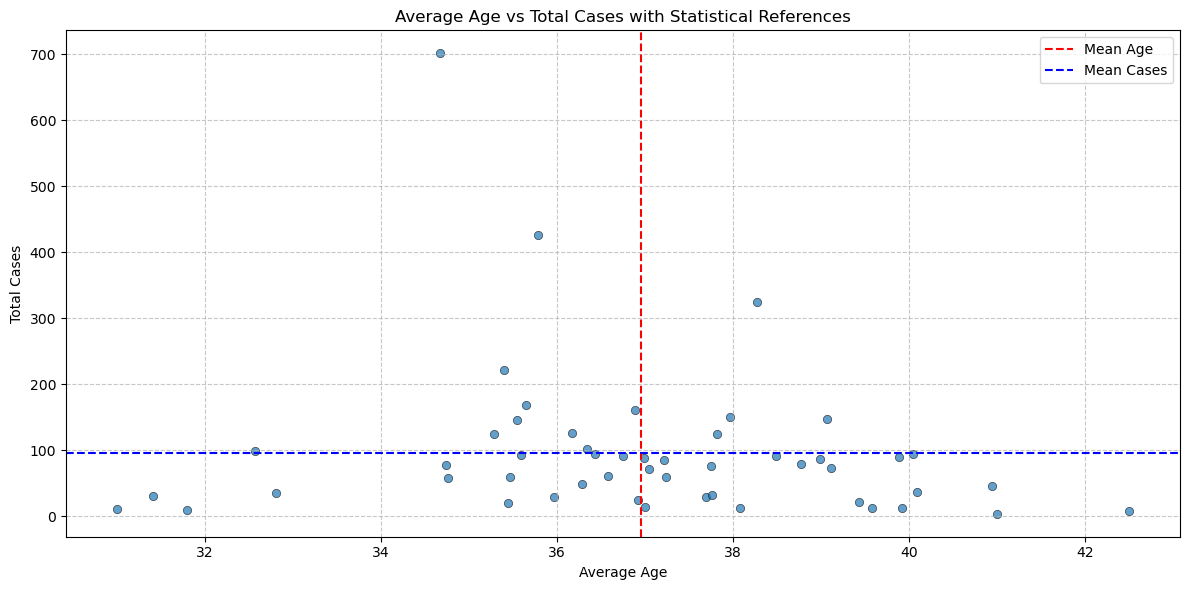

In [51]:
# Scatterplot with Statistical Reference Lines
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=aggregated_data, 
    x='avg_age', 
    y='total_cases', 
    alpha=0.7, 
    edgecolor='k'
)
# Mittelwerte als Linien hinzufügen
plt.axvline(aggregated_data['avg_age'].mean(), color='r', linestyle='--', label='Mean Age')
plt.axhline(aggregated_data['total_cases'].mean(), color='b', linestyle='--', label='Mean Cases')
plt.title('Average Age vs Total Cases with Statistical References')
plt.xlabel('Average Age')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

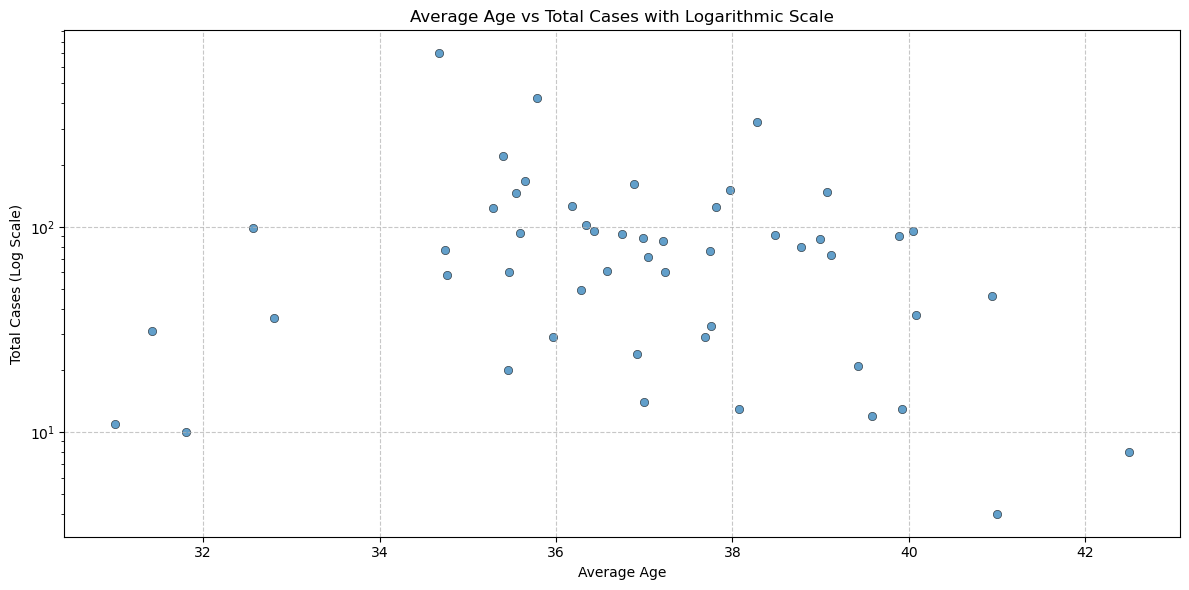

In [52]:
# Scatterplot with Logarithmic Scale for Total Cases
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=aggregated_data, 
    x='avg_age', 
    y='total_cases', 
    alpha=0.7, 
    edgecolor='k'
)
plt.yscale('log')  # Y-Achse auf logarithmische Skalierung setzen
plt.title('Average Age vs Total Cases with Logarithmic Scale')
plt.xlabel('Average Age')
plt.ylabel('Total Cases (Log Scale)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/Users/boraneker/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



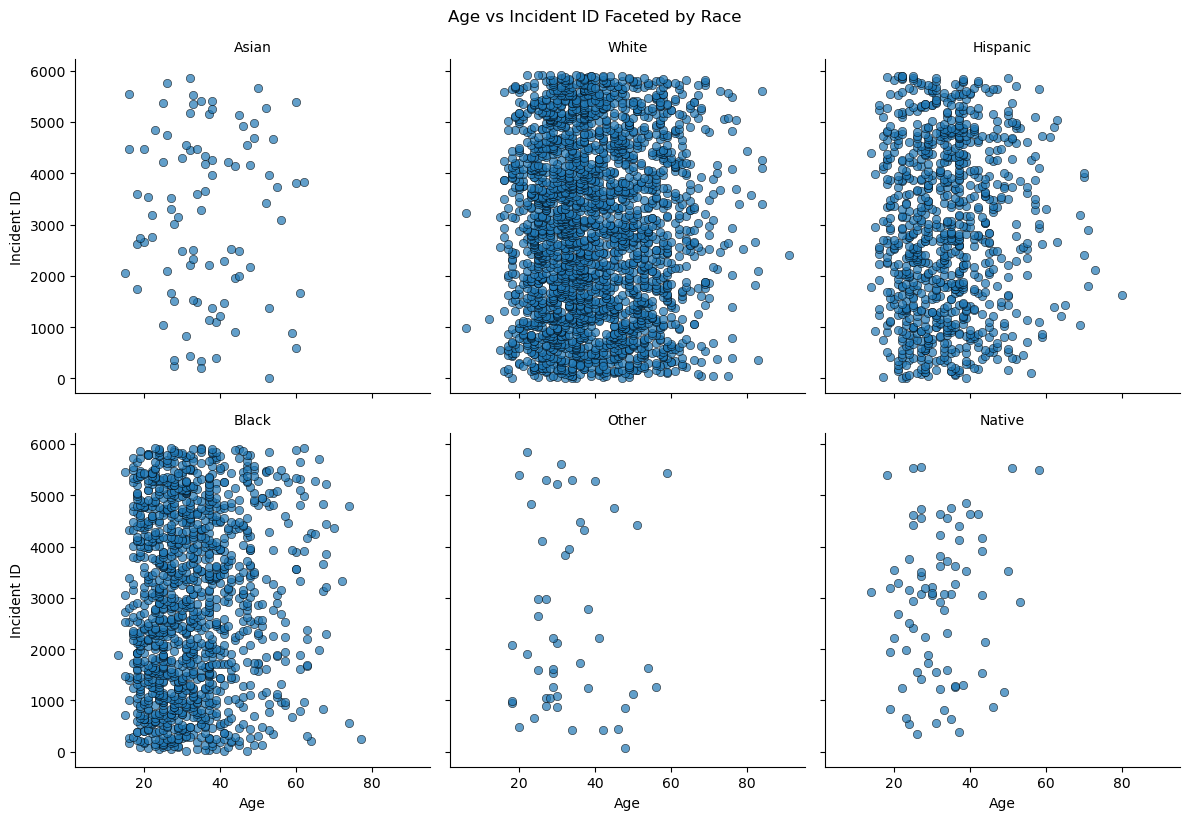

In [53]:
# Faceted Scatterplots by Race (less categories)
g = sns.FacetGrid(data, col="race", col_wrap=3, height=4, sharex=True, sharey=True)
g.map(sns.scatterplot, "age", "id", alpha=0.7, edgecolor='k')
g.set_axis_labels("Age", "Incident ID")
g.set_titles(col_template="{col_name}")
g.fig.suptitle('Age vs Incident ID Faceted by Race', y=1.02)
plt.show()


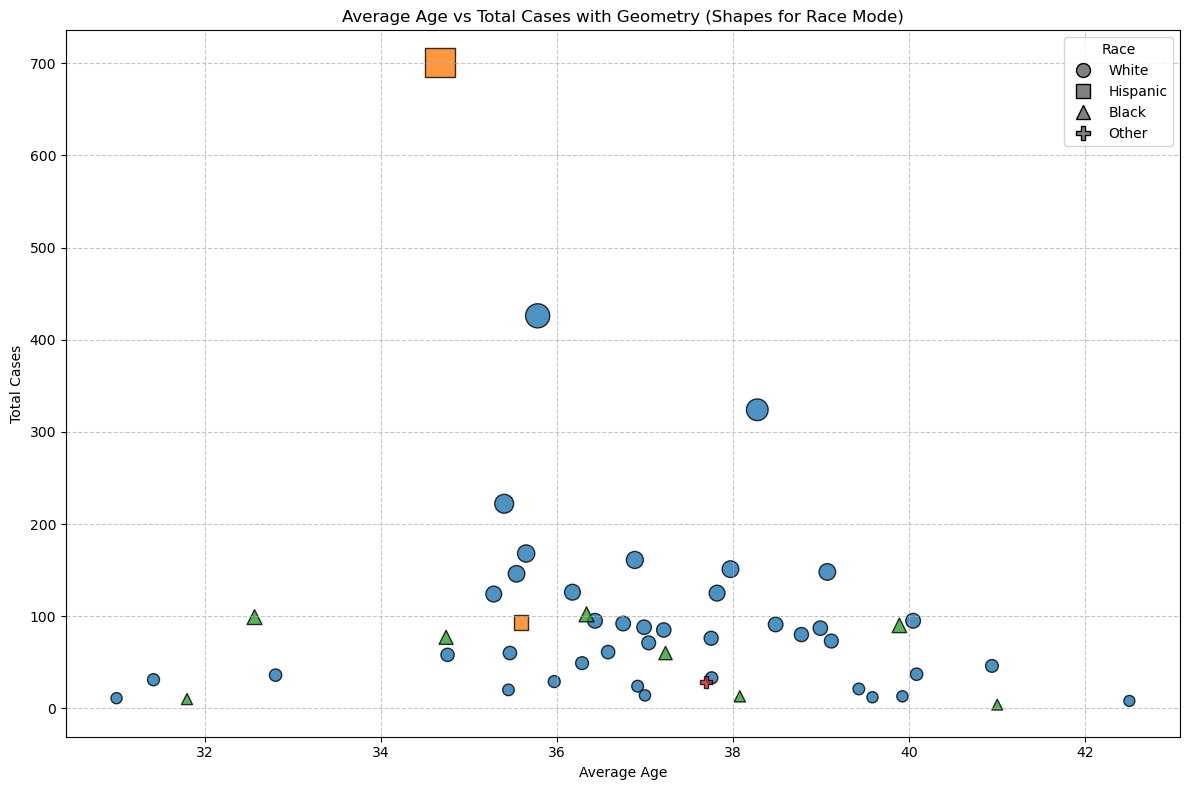

In [54]:
# Re-aggregate the data to include the most frequent race (mode) for each state
aggregated_data = data.groupby('state').agg(
    avg_age=('age', 'mean'),
    total_cases=('id', 'count'),
    race_mode=('race', lambda x: x.mode().iloc[0] if not x.mode().empty else 'Other')
).reset_index()

# Verify the aggregated data to ensure race_mode is present
aggregated_data.head()


# Recalculate min_cases and max_cases for scaling
min_cases = aggregated_data['total_cases'].min()
max_cases = aggregated_data['total_cases'].max()

# Adjust the scaling to make the points slightly larger
scaled_sizes = 60 + (aggregated_data['total_cases'] - min_cases) / (max_cases - min_cases) * 400

# Create a shape mapping dynamically based on the unique race_mode values
unique_races = aggregated_data['race_mode'].unique()
shape_mapping = {race: marker for race, marker in zip(unique_races, ['o', 's', '^', 'P', 'X', '*'])}

# Scatterplot with adjusted sizes
plt.figure(figsize=(12, 8))

for race, marker in shape_mapping.items():
    subset = aggregated_data[aggregated_data['race_mode'] == race]
    if not subset.empty:
        plt.scatter(
            subset['avg_age'],
            subset['total_cases'],
            alpha=0.8,
            s=scaled_sizes[subset.index],  # Adjusted scaled size
            marker=marker,
            label=race,
            edgecolor='k'
        )

# Create a custom legend with fixed marker sizes
handles = [
    plt.Line2D([0], [0], marker=marker, color='w', label=race, 
               markerfacecolor='gray', markersize=10, markeredgecolor='k') 
    for race, marker in shape_mapping.items()
]
plt.legend(handles=handles, title='Race', loc='upper right')

# Add labels, title, and grid
plt.xlabel('Average Age')
plt.ylabel('Total Cases')
plt.title('Average Age vs Total Cases with Geometry (Shapes for Race Mode)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

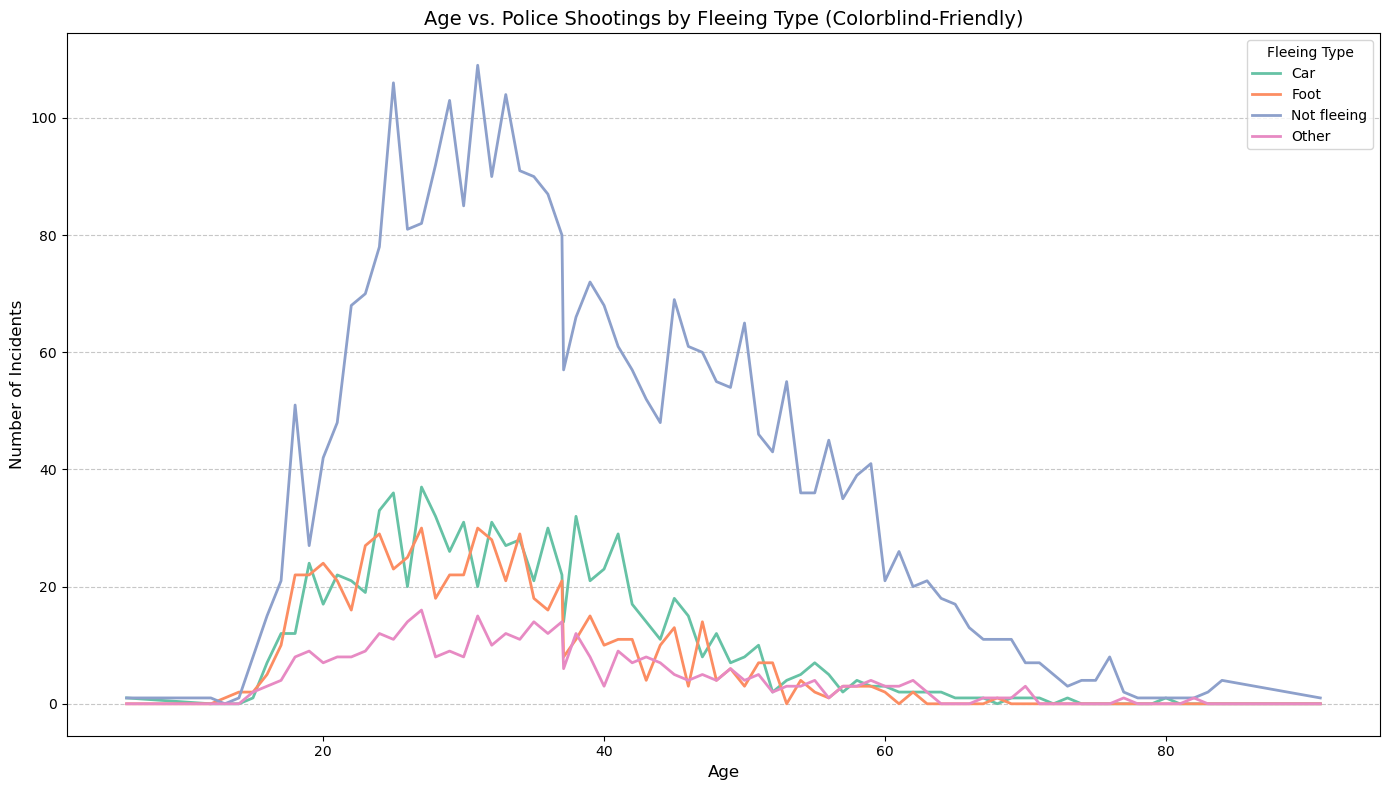

In [55]:
# Use a colorblind-friendly palette with distinct colors
color_palette = sns.color_palette("Set2", len(flee_type_counts_raw.columns))

# Plot the line chart for raw fleeing type counts with the adjusted color palette
plt.figure(figsize=(14, 8))

for flee_type, color in zip(flee_type_counts_raw.columns, color_palette):
    plt.plot(
        flee_type_counts_raw.index,  # Use raw age values as x-axis
        flee_type_counts_raw[flee_type],
        label=flee_type,
        color=color,
        linewidth=2
    )

# Adding titles, labels, and legend
plt.title('Age vs. Police Shootings by Fleeing Type (Colorblind-Friendly)', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.legend(title='Fleeing Type', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to fit everything

# Show the plot
plt.show()

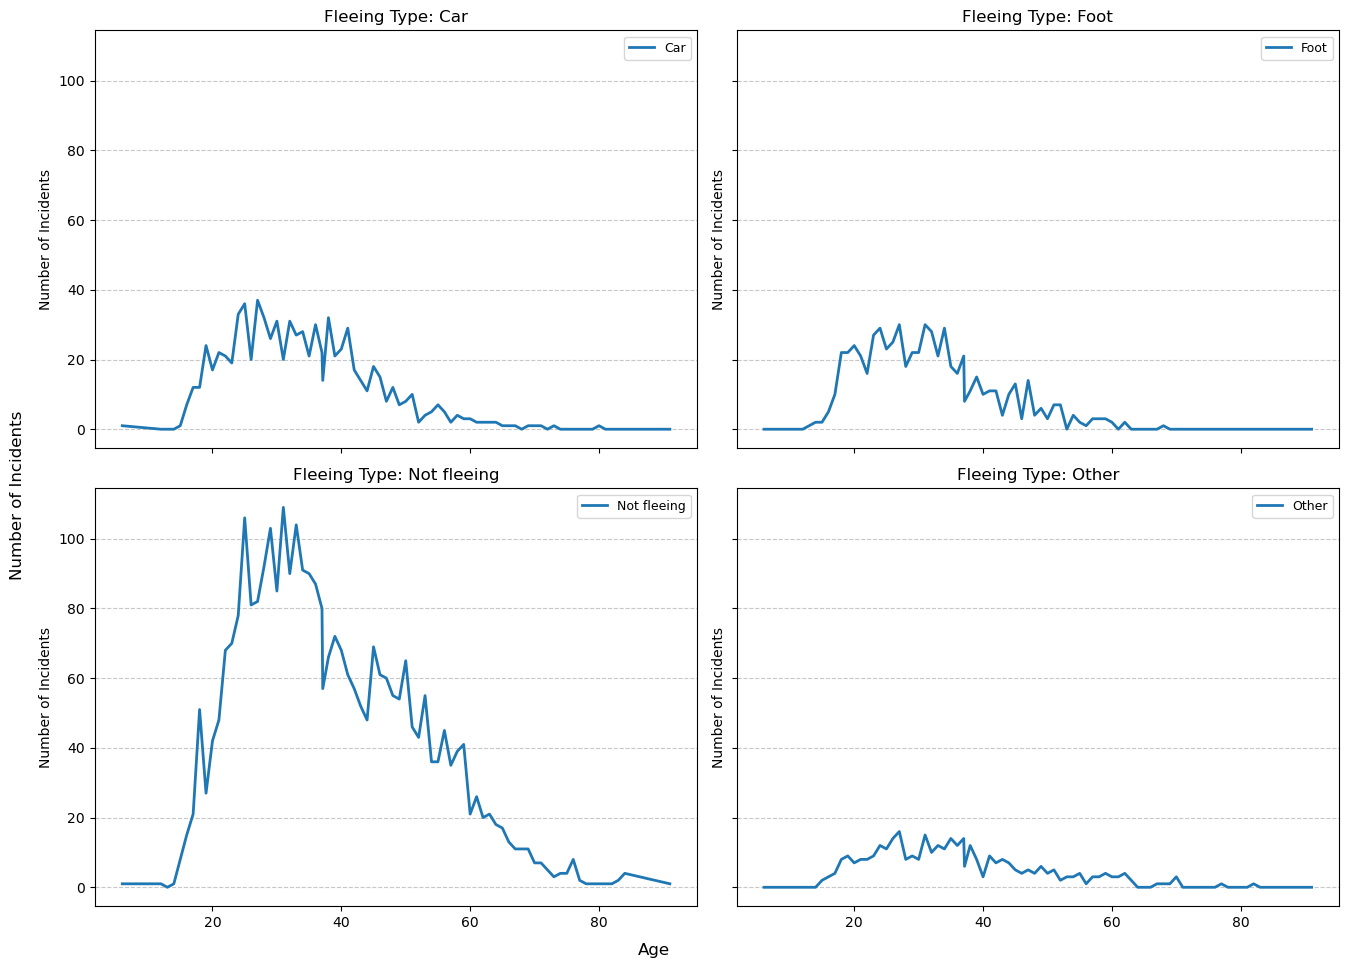

In [56]:
# Redefining flee_types since the previous session might not have persisted
flee_types = flee_type_counts_raw.columns

# Set up the figure for a 2x2 grid of facets
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create a line chart for each fleeing type in a 2x2 grid
for i, flee_type in enumerate(flee_types):
    axes[i].plot(
        flee_type_counts_raw.index,  # Use raw age values as x-axis
        flee_type_counts_raw[flee_type],  # Counts for the current fleeing type
        label=flee_type,
        color='tab:blue',
        linewidth=2
    )
    axes[i].set_title(f'Fleeing Type: {flee_type}', fontsize=12)
    axes[i].set_ylabel('Number of Incidents', fontsize=10)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    axes[i].legend(fontsize=9, loc='upper right')

# Hide unused subplots if there are fewer than 4 fleeing types
for j in range(len(flee_types), len(axes)):
    axes[j].set_visible(False)

# General x-label for all plots
fig.text(0.5, 0.04, 'Age', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'Number of Incidents', va='center', rotation='vertical', fontsize=12)

plt.tight_layout(rect=[0.05, 0.05, 1, 1])  # Adjust layout to fit labels and plots
plt.show()

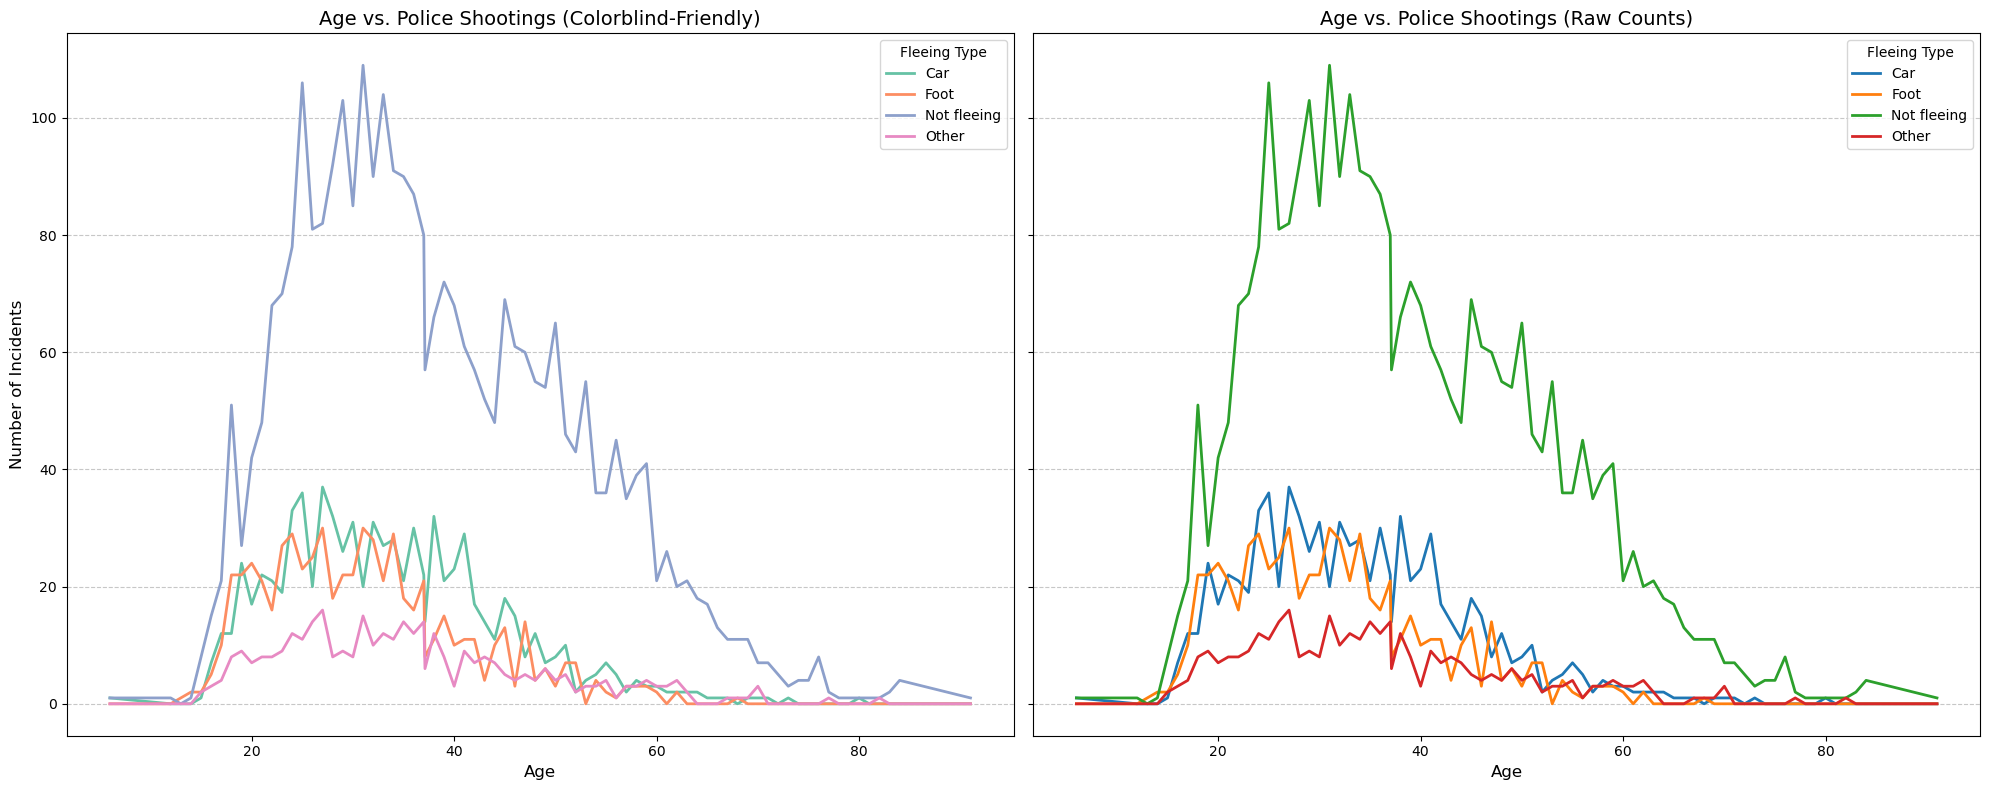

In [57]:
# Create a figure to place two plots side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Left plot: Colorblind-friendly palette
color_palette = sns.color_palette("Set2", len(flee_type_counts_raw.columns))

for flee_type, color in zip(flee_type_counts_raw.columns, color_palette):
    axes[0].plot(
        flee_type_counts_raw.index,  # Use raw age values as x-axis
        flee_type_counts_raw[flee_type],
        label=flee_type,
        color=color,
        linewidth=2
    )
axes[0].set_title('Age vs. Police Shootings (Colorblind-Friendly)', fontsize=14)
axes[0].set_xlabel('Age', fontsize=12)
axes[0].set_ylabel('Number of Incidents', fontsize=12)
axes[0].legend(title='Fleeing Type', fontsize=10)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Right plot: Standard raw counts
for flee_type in flee_type_counts_raw.columns:
    axes[1].plot(
        flee_type_counts_raw.index,
        flee_type_counts_raw[flee_type],
        label=flee_type,
        linewidth=2
    )
axes[1].set_title('Age vs. Police Shootings (Raw Counts)', fontsize=14)
axes[1].set_xlabel('Age', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].legend(title='Fleeing Type', fontsize=10)

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()

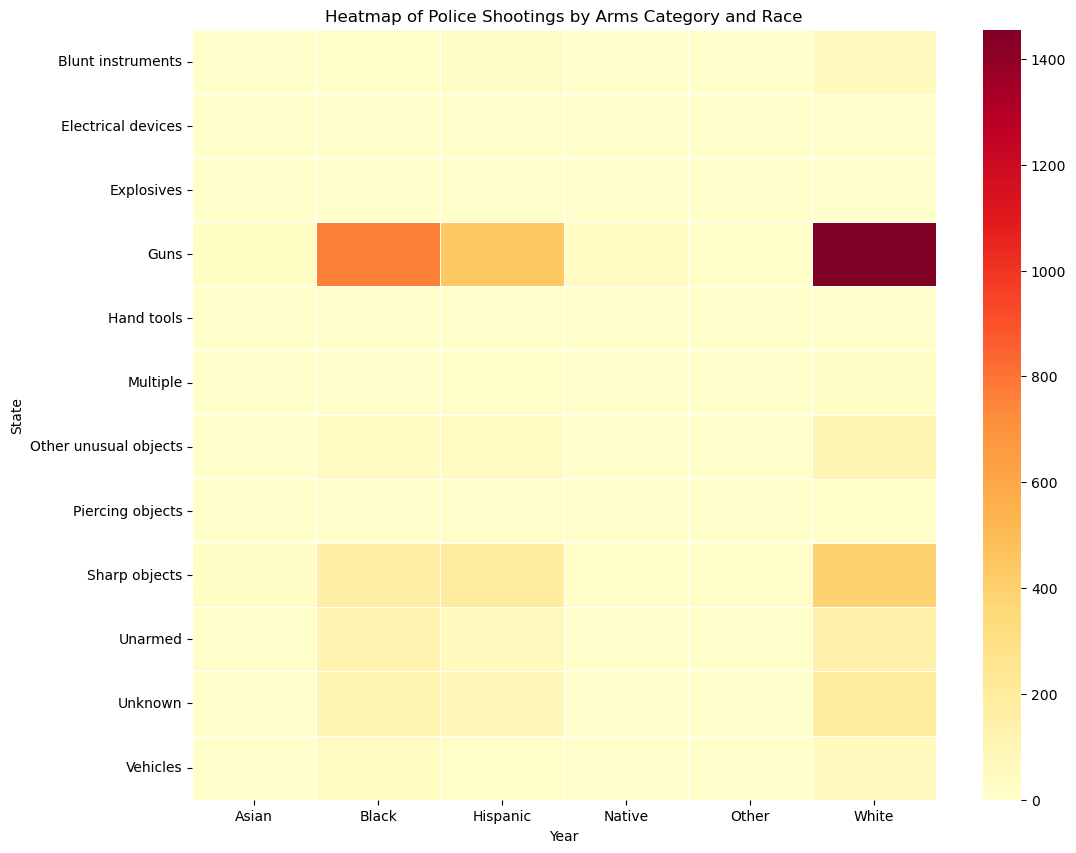

In [58]:
# Create a dataframe for the heatmap
heatmap_data = shootings_data.groupby(['arms_category', 'race']).size().unstack(fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, cmap="YlOrRd", linewidths=.5)
plt.title('Heatmap of Police Shootings by Arms Category and Race')
plt.xlabel('Year')
plt.ylabel('State')
plt.show()

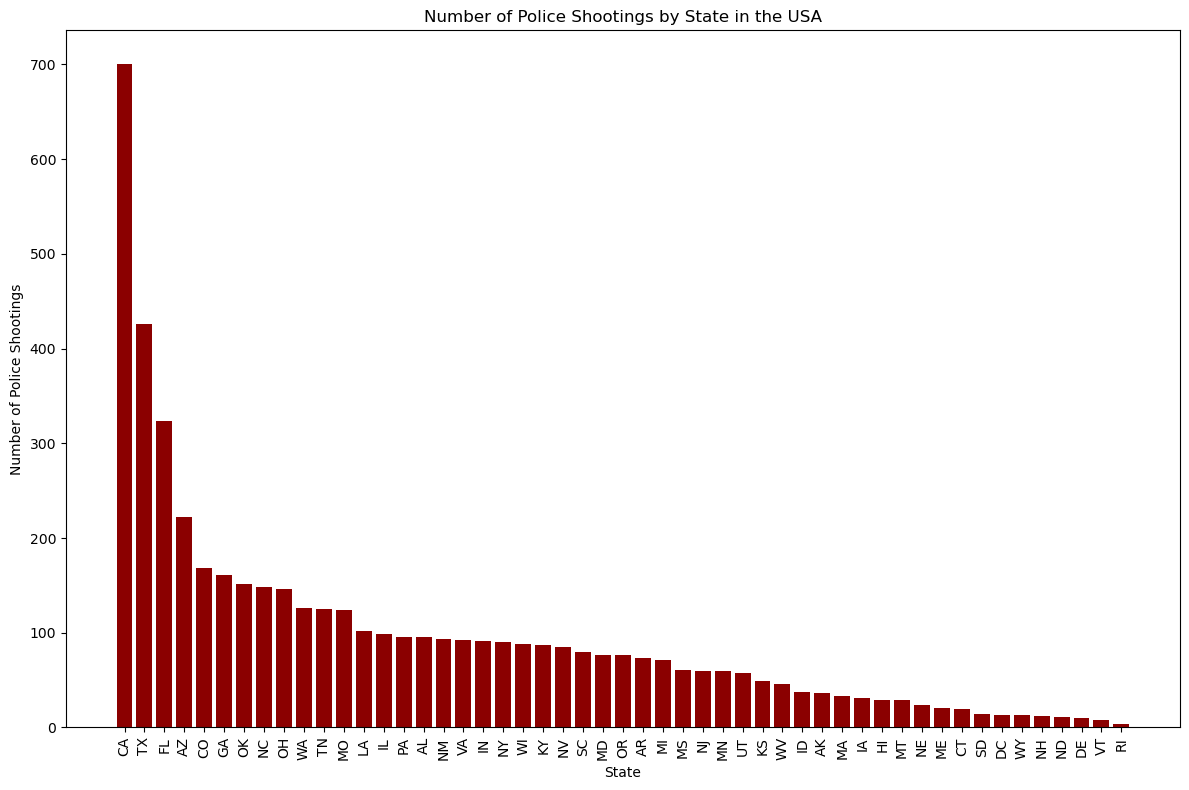

In [59]:
# Aggregate the data by state
state_aggregation = shootings_data['state'].value_counts().reset_index()
state_aggregation.columns = ['state', 'count']

# Sort the data by count in descending order
sorted_state_aggregation = state_aggregation.sort_values('count', ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 8))
plt.bar(sorted_state_aggregation['state'], sorted_state_aggregation['count'], color='darkred')
plt.xlabel('State')
plt.ylabel('Number of Police Shootings')
plt.title('Number of Police Shootings by State in the USA')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

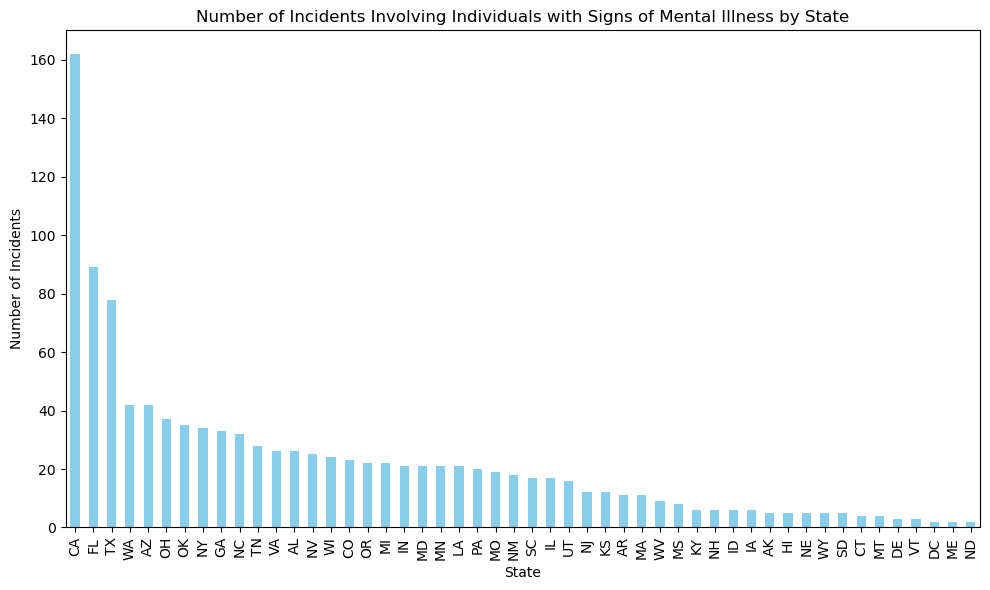

In [61]:
# Filter the data to focus on incidents involving individuals with signs of mental illness
mental_illness_data = data[data['signs_of_mental_illness'] == True]

# Group the data by state and count the number of incidents in each state
incident_counts_by_state = mental_illness_data['state'].value_counts()

plt.figure(figsize=(10, 6))
incident_counts_by_state.plot(kind='bar', color='skyblue')
plt.title('Number of Incidents Involving Individuals with Signs of Mental Illness by State')
plt.xlabel('State')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the chart
plt.show()